### Loading the Data Set

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

df=pd.read_csv('Customer_Churn.csv')

In [31]:
df.info() #Checkinhg the Columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [32]:
df.head() #Checking the Rows


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


### Data Preprocessing

In [33]:
# Step 1: Handling Duplicate Entries
df = df.drop_duplicates()

# Step 2: Handling Missing Values (if any)
missing_values = df.isnull().sum()

# Step 3: Renaming Columns
df.columns = df.columns.str.replace(' ', '_').str.lower()
# Step 4: Outlier Detection and Treatment 
Q1 = df['seconds_of_use'].quantile(0.25)
Q3 = df['seconds_of_use'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df['seconds_of_use'] = df['seconds_of_use'].clip(upper=upper_bound)

#Step 4: #Dropping Irrelavant columns
df.drop("customer_value", axis=1, inplace=True)

In [34]:
df.info() #Checking the data set after pre processing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2850 entries, 0 to 3131
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call__failure            2850 non-null   int64  
 1   complains                2850 non-null   int64  
 2   subscription__length     2850 non-null   int64  
 3   charge__amount           2850 non-null   int64  
 4   seconds_of_use           2850 non-null   float64
 5   frequency_of_use         2850 non-null   int64  
 6   frequency_of_sms         2850 non-null   int64  
 7   distinct_called_numbers  2850 non-null   int64  
 8   age_group                2850 non-null   int64  
 9   tariff_plan              2850 non-null   int64  
 10  status                   2850 non-null   int64  
 11  age                      2850 non-null   int64  
 12  churn                    2850 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 311.7 KB


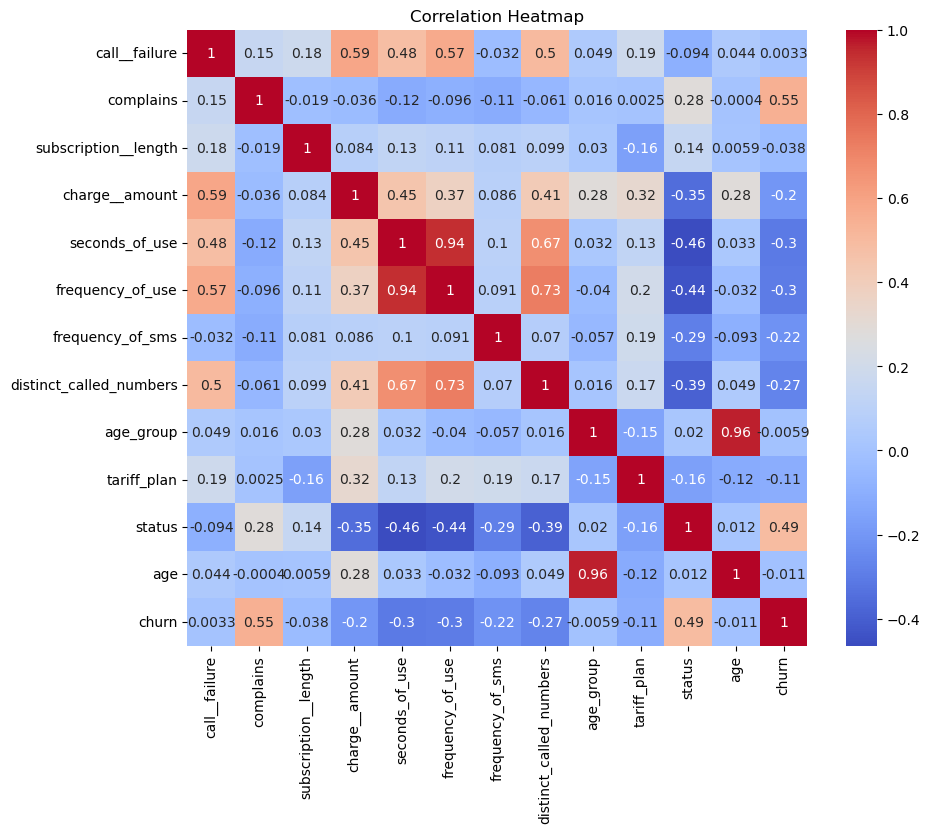

In [35]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


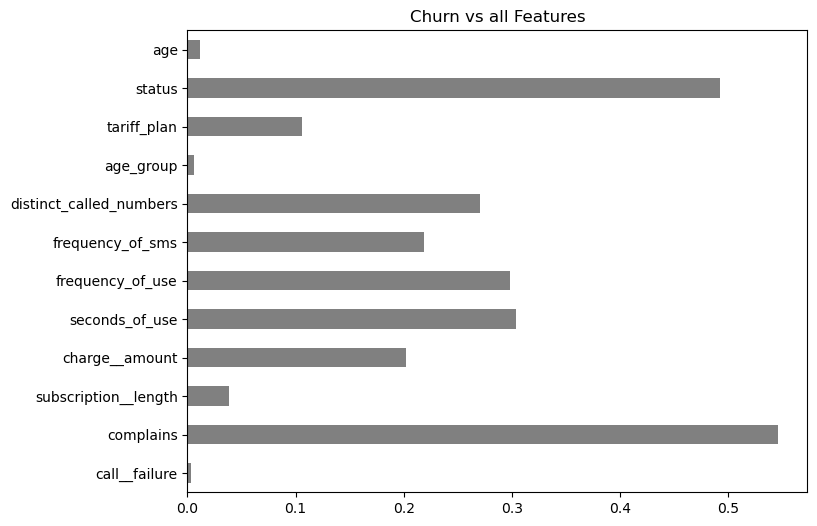

In [36]:
#feature importance using correlation
df.drop('churn', axis=1).corrwith(df.churn).abs().plot(kind='barh',
                                                           figsize=(8, 6),
                                                           color='grey',
                                                           title="Churn vs all Features")
plt.show()

In [14]:
#Splitting into features and target variable
X = df.drop('churn', axis=1)  # Drop the 'churn' column to get the features
Y = df['churn']  # Assign the 'churn' column as the target variable

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform the data
X_scaled = scaler.fit_transform(X)

### Training the Dataset

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

### Applying Regression Models 

In [16]:
# Random Forest Regression
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, Y_train)
Y_pred_rf = rf_reg.predict(X_test)
r2_rf = r2_score(Y_test, Y_pred_rf)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
rmse_rf = mean_squared_error(Y_test, Y_pred_rf, squared=False)
mae_rf = mean_absolute_error(Y_test, Y_pred_rf)

# Decision Tree Regression
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
Y_pred_tree = decision_tree.predict(X_test)
r2_tree = r2_score(Y_test, Y_pred_tree)
mse_tree = mean_squared_error(Y_test, Y_pred_tree)
rmse_tree = mean_squared_error(Y_test, Y_pred_tree, squared=False)
mae_tree = mean_absolute_error(Y_test, Y_pred_tree)

# Gradient Boosting Regression
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, Y_train)
Y_pred_gradient = gradient_boosting.predict(X_test)
r2_gradient = r2_score(Y_test, Y_pred_gradient)
mse_gradient = mean_squared_error(Y_test, Y_pred_gradient)
rmse_gradient = mean_squared_error(Y_test, Y_pred_gradient, squared=False)
mae_gradient = mean_absolute_error(Y_test, Y_pred_gradient)

# Print the evaluation metrics
print("Random Forest Regression:")
print("R-squared value:", r2_rf)
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("Mean Absolute Error:", mae_rf)
print()

print("Decision Tree Regression:")
print("R-squared value:", r2_tree)
print("Mean Squared Error:", mse_tree)
print("Root Mean Squared Error:", rmse_tree)
print("Mean Absolute Error:", mae_tree)
print()

print("Gradient Boosting Regression:")
print("R-squared value:", r2_gradient)
print("Mean Squared Error:", mse_gradient)
print("Root Mean Squared Error:", rmse_gradient)
print("Mean Absolute Error:", mae_gradient)

Random Forest Regression:
R-squared value: 0.7118116562132573
Mean Squared Error: 0.037971852290448346
Root Mean Squared Error: 0.19486367616990177
Mean Absolute Error: 0.07231783625730993

Decision Tree Regression:
R-squared value: 0.5106753252820668
Mean Squared Error: 0.06447368421052632
Root Mean Squared Error: 0.2539166875385041
Mean Absolute Error: 0.06754385964912281

Gradient Boosting Regression:
R-squared value: 0.6650102394497954
Mean Squared Error: 0.044138432315770096
Root Mean Squared Error: 0.21009148558608962
Mean Absolute Error: 0.1133560260889007


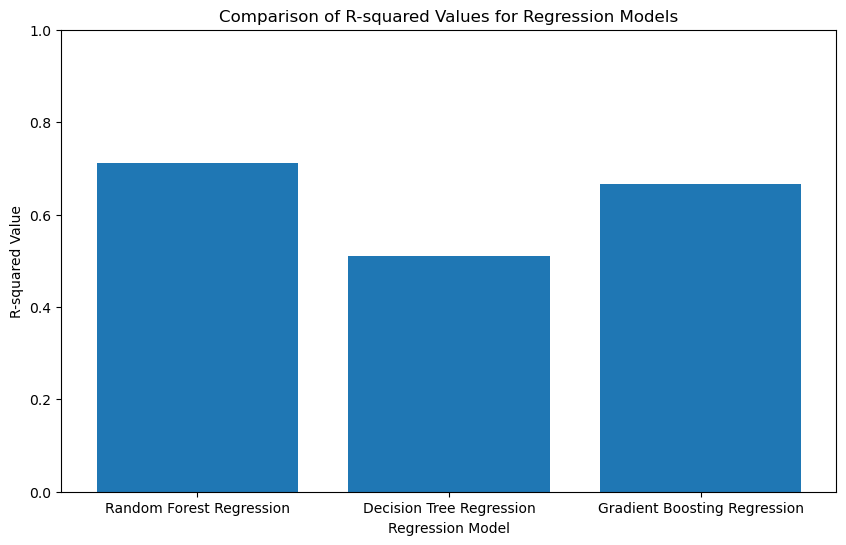

In [25]:

# Create a list of model names for labeling the plot
model_names = ['Random Forest Regression', 'Decision Tree Regression', 'Gradient Boosting Regression']

# Create a list of R-squared values for each model
r2_values = [r2_rf, r2_tree, r2_gradient]

# Create a bar plot to compare the R-squared values
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values)
plt.xlabel('Regression Model')
plt.ylabel('R-squared Value')
plt.title('Comparison of R-squared Values for Regression Models')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1 for R-squared values
plt.show()


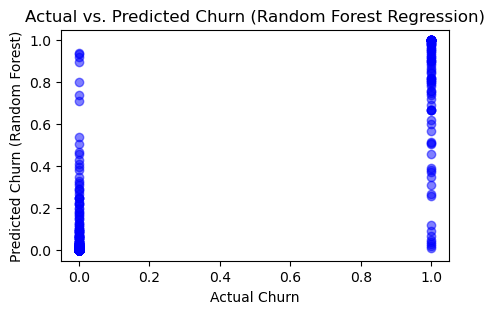

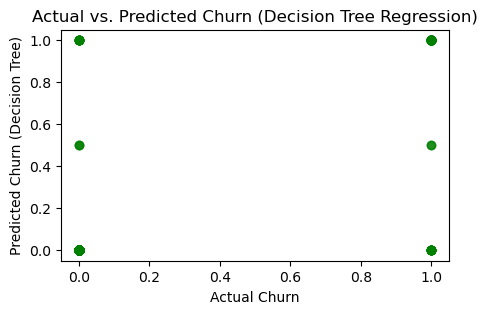

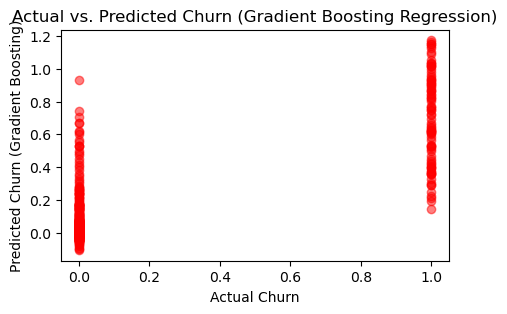

In [28]:
# Scatter plot of actual vs. predicted values for Random Forest Regression
plt.figure(figsize=(5, 3))
plt.scatter(Y_test, Y_pred_rf, color='blue', alpha=0.5)
plt.xlabel('Actual Churn')
plt.ylabel('Predicted Churn (Random Forest)')
plt.title('Actual vs. Predicted Churn (Random Forest Regression)')
plt.show()

# Scatter plot of actual vs. predicted values for Decision Tree Regression
plt.figure(figsize=(5, 3))
plt.scatter(Y_test, Y_pred_tree, color='green', alpha=0.5)
plt.xlabel('Actual Churn')
plt.ylabel('Predicted Churn (Decision Tree)')
plt.title('Actual vs. Predicted Churn (Decision Tree Regression)')
plt.show()

# Scatter plot of actual vs. predicted values for Gradient Boosting Regression
plt.figure(figsize=(5, 3))
plt.scatter(Y_test, Y_pred_gradient, color='red', alpha=0.5)
plt.xlabel('Actual Churn')
plt.ylabel('Predicted Churn (Gradient Boosting)')
plt.title('Actual vs. Predicted Churn (Gradient Boosting Regression)')
plt.show()
